## Imports and load data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv('breast-cancer.data', header=None)
df.columns = ['class', 'age', 'menopause', 'tumor-size', 'inv-nodes', 'node-caps', 'deg-malig', 'breast', 'breast-quad', 'irradiat']

In [3]:
#look at unique items in all columns
for col in df:
    print(col, ': ', df[col].unique())

class :  ['no-recurrence-events' 'recurrence-events']
age :  ['30-39' '40-49' '60-69' '50-59' '70-79' '20-29']
menopause :  ['premeno' 'ge40' 'lt40']
tumor-size :  ['30-34' '20-24' '15-19' '0-4' '25-29' '50-54' '10-14' '40-44' '35-39'
 '5-9' '45-49']
inv-nodes :  ['0-2' '6-8' '9-11' '3-5' '15-17' '12-14' '24-26']
node-caps :  ['no' 'yes' '?']
deg-malig :  [3 2 1]
breast :  ['left' 'right']
breast-quad :  ['left_low' 'right_up' 'left_up' 'right_low' 'central' '?']
irradiat :  ['no' 'yes']


#### pie chart

In [4]:
tmp = df[['tumor-size']].apply(pd.value_counts)
tmp

,tumor-size
30-34,60
25-29,54
20-24,50
15-19,30
10-14,28
40-44,22
35-39,19
0-4,8
50-54,8
5-9,4


In [5]:
vals = tmp['tumor-size'].to_list()
inds = tmp.index

([<matplotlib.patches.Wedge at 0x23d71704eb0>,
 [Text(0.8696146611456995, 0.6736247776918916, '30-34'),
  Text(-0.36737738630868066, 1.0368383943648125, '25-29'),
  Text(-1.0957554580037052, 0.09654002410964323, '20-24'),
  Text(-0.7735337350445108, -0.7820777204012966, '15-19'),
  Text(-0.15654630124901567, -1.0888035890670331, '10-14'),
  Text(0.43486578274628557, -1.0103918799141551, '40-44'),
  Text(0.83132455018343, -0.7203467861122987, '35-39'),
  Text(1.005554215159562, -0.44593802301983365, '0-4'),
  Text(1.0680360029605007, -0.263247215332199, '50-54'),
  Text(1.0933703052139108, -0.12058762654783224, '5-9'),
  Text(1.0994027814927017, -0.03624257228882787, '45-49')])

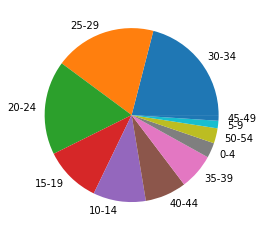

In [6]:
plt.pie(vals, labels=inds)

#### scatter

In [7]:
tmp = df[['tumor-size', 'deg-malig']]
tmp = tmp.groupby(tmp.columns.tolist(),as_index=False).size()

Text(0.5, 1.0, 'frequency of tumor size vs. deg of malignancy')

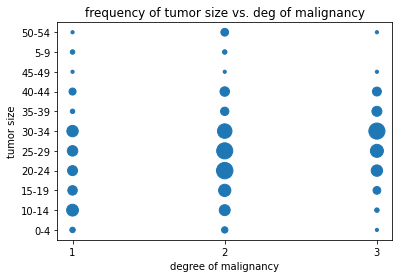

In [8]:
x = tmp['deg-malig'].to_list()
y = tmp['tumor-size'].to_list()
s = np.array(tmp['size'].to_list()) * 10
plt.scatter(
    x=x,
    y=y,
    s=s,
)
plt.xlabel('degree of malignancy')
plt.ylabel('tumor size')
plt.xticks([1, 2, 3])

plt.title('frequency of tumor size vs. deg of malignancy')

#### heat map

<AxesSubplot:xlabel='deg-malig', ylabel='tumor-size'>

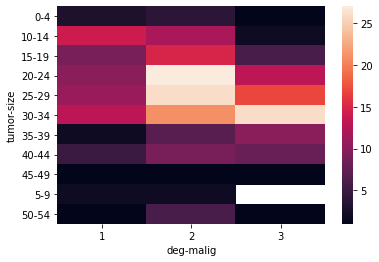

In [9]:
tmp = tmp.pivot('tumor-size','deg-malig','size')
sns.heatmap(tmp)

#### boxplot

<AxesSubplot:xlabel='deg-malig', ylabel='tumor-size'>

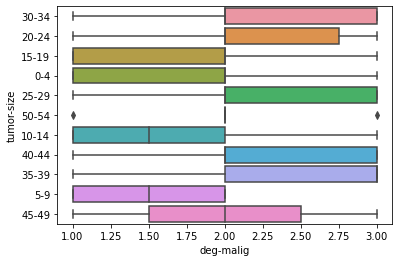

In [10]:
sns.boxplot(data=df, x='deg-malig', y='tumor-size')